# Artificial Neural Network (ANN)

### The main objective of the deep learning algorithm so far has been to use machine learning to achieve Artificial General Intelligence (AGI), that is, replicate human-level intelligence in machines to solve any problems for a given area. Deep learning has shown promising outcomes in computer vision, audio processing, and text mining. 

### 1. ANN introduction

The human brain is a complex connected neural
network where different regions of the brain are responsible for different jobs, and these
regions are machines of the brain that receive signals and processes it to take necessary
action.

## What Goes Behind, When Computers Look at an Image?

![image.png](image.png)

## Why Not a Simple Classification Model for Images?

Image classification can be challenging for a computer as there are a variety of challenges
associated with representation of the images. A simple classification model might not
be able to address most of these issues without a lot of feature engineering effort. Let’s
understand some of the key issues

#### View point variation: Same object can have different orientation.

![image.png](image_challenge.png)

### 2. Perception – single artificial neuron

![image.png](perceptron.png)

### 3. Multilayer Perceptrons (Feedforward Neural Network)

It is a composition of multiple perceptrons connected in different ways and operating on distinctive activation functions to enable improved learning mechanisms.
The training sample propagates forward through the network and the output error is back propagated and the error is minimized using the gradient descent method, which will calculate a loss function for all the weights in the network.


![image.png](multi_perceptron.png)

## 4. Example

### 4.1. Load MNIST Data

#### Load MNIS Data and show initial labels

We have 1797 samples


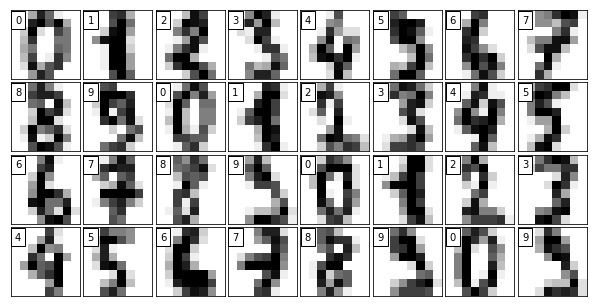

In [4]:
# Load MNIST Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_digits

np.random.seed(seed=2017)

# Load data
digits = load_digits()
print('We have %d samples' % len(digits.target))

## plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,
                    wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

# ----- output ----
plt.show()

### 4.2. Key Parameters for scikit-learn MLP

Number of samples in training set: 1437
Number of samples in test set: 360


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.990953
Test set score: 0.983333


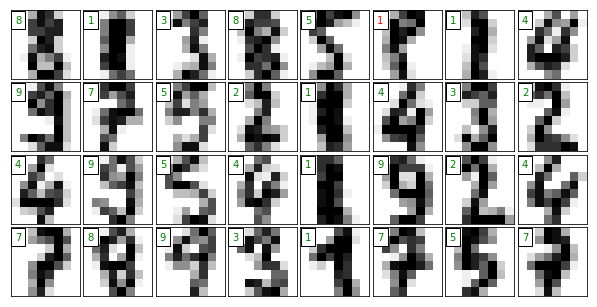

In [5]:
# Key Parameters for scikit-learn MLP
# Listing 6-3. Example code for sklearn MLP classifier

# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)
print('Number of samples in training set: %d' % (len(y_train)))
print('Number of samples in test set: %d' % (len(y_test)))

# standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=100)

# Train the classifier with the training data
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

print('Training set score: %f' % mlp.score(X_train_scaled, y_train))
print('Test set score: %f' % mlp.score(X_test_scaled, y_test))

# predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)

fig = plt.figure(figsize=(8,8)) # figure size in inches
fig.subplots_adjust(left=0,right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1,8,8)[i], cmap=plt.cm.gray_r)

    #label the image with the target value
    if X_test_predicted[i] == y_test[i]:
        ax.text(0,1,X_test_predicted[i], color='green', bbox=dict(facecolor='white'))
    else:
        ax.text(0,1,X_test_predicted[i], color='red', bbox=dict(facecolor='white'))
plt.show()